In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
#IMPORTING TRAIN DATASET 
df=pd.read_excel("E:\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx")
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#IMPORTING TRAIN DATASET
test=pd.read_excel("E:\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx")
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
#CHECKING DATATYPES OF DATAFRAME
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Except price all are string data type

In [5]:
#SHAPE OF DATAFRAME
df.shape

(10683, 11)

It has 11 columns and 10683 rows

In [6]:
#COLUMNS IN DATAFRAME
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
#CHECKING NULL VALUES
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

THERE ARE NULL VALUES IN ROUTE AND TOTAL_STOPS CLOUMNS RESPECTIVELLY

Handing null values

In [8]:
df_new=df

In [9]:
print(df['Route'].mode())
print(df['Total_Stops'].mode())

0    DEL → BOM → COK
dtype: object
0    1 stop
dtype: object


In [10]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
test[test['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [12]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [13]:
#REPLACING EMPTY SPACES WITH DEL, BOM, COK AND 1 STOP RESPECTIVE COLUMNS
df_new['Route'].fillna("DEL ? BOM ? COK",inplace=True)
df_new['Total_Stops'].fillna("1 stop",inplace=True)

null value is replaced with mode value

Handling Date column

In [14]:
test_new=test

In [15]:
#CONVERTING DATE AND TIME IN DD/MM/YYYY FORMAT
df_new["Month"] = pd.to_datetime(df["Date_of_Journey"],format = "%d/%m/%Y").dt.month
df_new["Day"] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [16]:
test_new["Month"] = pd.to_datetime(test["Date_of_Journey"],format = "%d/%m/%Y").dt.month
test_new["Day"] = pd.to_datetime(test["Date_of_Journey"],format="%d/%m/%Y").dt.day

In this dataset we are going to analyse dataset with same year 2019 so I have splitted Date of journey into two seperate coloumns

In [17]:
df_new.drop(["Date_of_Journey"],axis=1,inplace=True)
test_new.drop(["Date_of_Journey"],axis=1,inplace=True)

In [18]:
df_new.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


Handling Time Feature

In [19]:
#CONVERTING TIME IN HH:MIN:SEC FORMAT
df_new['Dep_hour'] = pd.to_datetime(df["Dep_Time"]).dt.hour
df_new["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df_new.drop(['Dep_Time'],axis=1,inplace=True)

In [20]:
test_new['Dep_hour'] = pd.to_datetime(test["Dep_Time"]).dt.hour
test_new["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test_new.drop(['Dep_Time'],axis=1,inplace=True)

In [21]:
df_new.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [22]:
test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,5,21,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,6,24,23,55


In [23]:
#CONVERTING DURATION HOURS IN READABLE FORMAT
duration = list(df["Duration"])
hours = []
mins = []

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]
for i in range(len(duration)):
    hours.append(int(duration[i].split(sep = "h")[0]))
    mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [24]:
duration = list(test["Duration"])
hours = []
mins = []

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]
for i in range(len(duration)):
    hours.append(int(duration[i].split(sep = "h")[0]))
    mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [25]:
df_new.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [26]:
#CONVERTING ARRIVAL_HOUR TO DATETIME FORMAT
df_new['Arrival_hour'] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df_new["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df_new.drop(['Arrival_Time'],axis=1,inplace=True)

In [27]:
test_new['Arrival_hour'] = pd.to_datetime(test["Arrival_Time"]).dt.hour
test_new["Arrival_min"] = pd.to_datetime(test["Arrival_Time"]).dt.minute
test_new.drop(['Arrival_Time'],axis=1,inplace=True)

In [28]:
#REMOVING DURATION COLUMN FROM DF ANF TEST_NEW DATAFRAME
df_new.drop(['Duration'],axis=1,inplace=True)
test_new.drop(['Duration'],axis=1,inplace=True)

In [29]:
df_new.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35


In [30]:
test_new.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month,Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,23,55,2,45


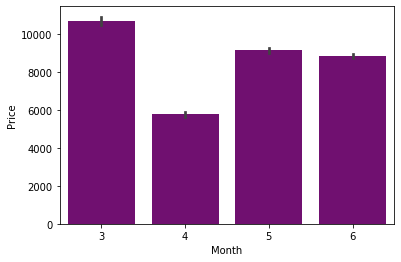

In [31]:
#PLOTTING GRAPH TO ANALYSIS DATA
sns.barplot(x="Month",y="Price",data=df_new,color='purple')
plt.show()

mostly the price high in 3rd month

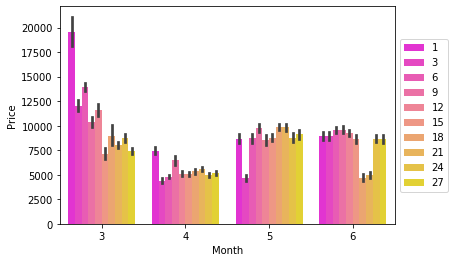

In [32]:
sns.barplot(x="Month",y="Price",data=df_new,palette='spring',hue='Day')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

mostly the price is high in march first two weeks. first day of every month has high price

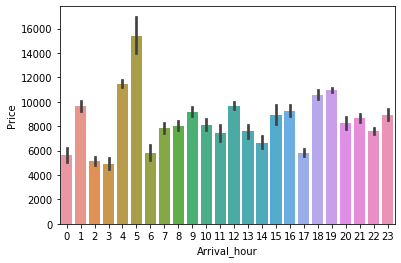

<module 'matplotlib.pyplot' from 'C:\\Users\\WIN-10\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [33]:
sns.barplot(x="Arrival_hour",y="Price",data=df_new)
plt.show()
plt

above grph shows price is high for the arrival hour around 4 and 5 while less inlate hours around 20 to 23

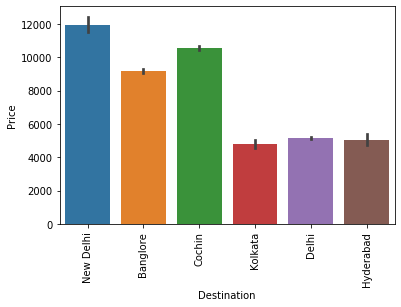

In [34]:
sns.barplot(x="Destination",y="Price",data=df_new)
plt.xticks(rotation=90)
plt.show()

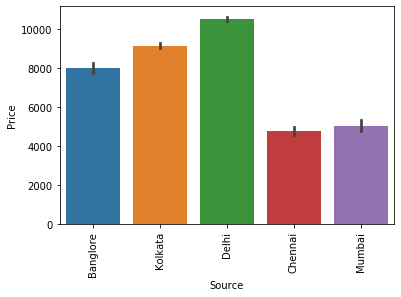

In [35]:
sns.barplot(x="Source",y="Price",data=df_new)
plt.xticks(rotation=90)
plt.show()

In [36]:
df_new.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month', 'Day', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [37]:
#USING labelEncoder TO CONVERT OBEJECT DTYPES TO FLOAT DTYPES
data_new=df_new
col_encod=['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month', 'Day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_new[col]= label.fit_transform(df_new[col])

In [38]:
data_new.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,65,0,8,22,4,1,2
1,1,3,0,84,1,8,669,2,0,5,10,13,3
2,4,2,1,119,1,8,1537,3,3,9,5,4,5
3,3,3,0,91,0,8,389,2,4,18,1,23,6
4,3,0,5,29,0,8,1457,0,0,16,10,21,7


In [39]:
col_encod=['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Month', 'Day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    test_new[col]= label.fit_transform(test_new[col])

In [40]:
test_new.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month,Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,0,5,3,2,17,6,4,5
1,3,3,0,65,0,5,2,4,6,4,10,4
2,4,2,1,76,0,3,2,7,19,3,19,0
3,6,2,1,76,0,5,2,7,8,0,21,0
4,0,0,2,16,4,5,3,8,23,11,2,9


Corelation matrix

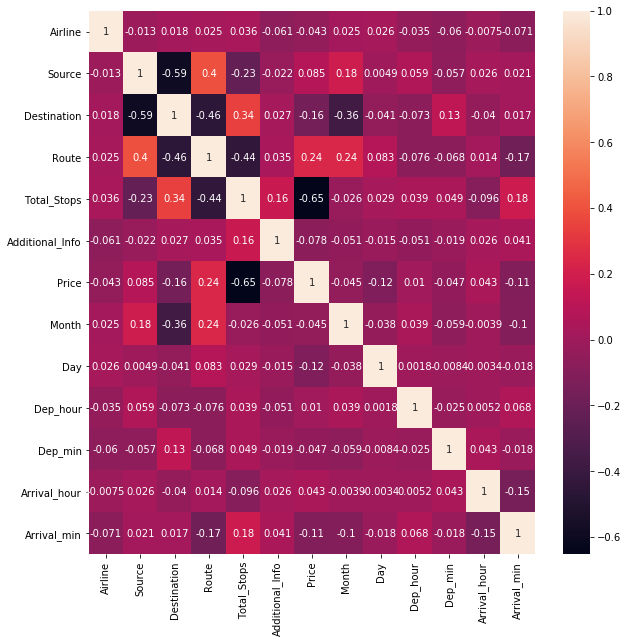

In [41]:
correlation=data_new.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

price is highly corelated with duration hour. price is negatively corelated with total stops

In [42]:
x1=data_new.drop('Price',axis=1)
y1=data_new['Price']

In [43]:
#USING MIN MAX SCALER FOR SCALING OF DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

feature scaling transforming unscaled data into scaled data using min max scaling technique

In [44]:
#IMPORTING MODELS 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
x=scaled
y=y1

In [45]:
#SPLIITING AND TEST TRAIN DATA WITH RANDOM STATE 1
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [46]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 162.3089479595657
Mean squared error 63698.521302882815
Root Mean squared error 252.385659859832
R2 Score 0.8038882906384431
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 384.16969793948493
Mean squared error 208119.29976922294
Root Mean squared error 456.2009423151414
R2 Score 0.35925307536102224
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 77.15549731686009
Mean squared error 29459.715836765256
Root Mean squared error 171.638328577172
R2 Score 0.9093009521746576
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 345.23978050590716
Mean squared error 179514.25444522087
Root Mean squared error 423.6912253578316
R2 Score 0.44732080786270234
-------------------------

CROSS VALIDATION

In [47]:
scorel=[]

In [48]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.83138383, 0.82290629, 0.80885431, 0.80066825, 0.80321196])

In [49]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.36654295, 0.37439847, 0.37699754, 0.37232823, 0.36209175])

In [50]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.89492001, 0.8987014 , 0.90397083, 0.89601067, 0.90333727])

In [51]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.44425388, 0.47483384, 0.45354785, 0.43061201, 0.43111242])

In [52]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.94626712, 0.9405714 , 0.94066981, 0.93298486, 0.93948961])

In [53]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.8575511 , 0.86048167, 0.85725632, 0.8543379 , 0.86214163])

Difference of predicted model and crossvalidation score

In [54]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),
        RandomForestRegressor(),GradientBoostingRegressor()]
for i in range(0,6):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [ 0.02749553  0.019018    0.00496602 -0.00322004 -0.00067633]
SVR() difference is [0.00728988 0.01514539 0.01774446 0.01307515 0.00283868]
DecisionTreeRegressor() difference is [-0.01438094 -0.01059955 -0.00533012 -0.01329028 -0.00596368]
LinearRegression() difference is [-0.00306693  0.02751303  0.00622704 -0.0167088  -0.01620839]
RandomForestRegressor() difference is [ 0.00814547  0.00244975  0.00254816 -0.00513679  0.00136797]
GradientBoostingRegressor() difference is [-0.00352424 -0.00059367 -0.00381902 -0.00673744  0.00106629]


Random forest has least difference

In [55]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt','log2'],'n_estimators': [10, 100, 200, 500],'bootstrap':[True],'max_depth': [1, 23, 45],'min_samples_split': [5, 10]}
grid = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 5, scoring = "r2")

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'bootstrap': True, 'max_depth': 45, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 500}


MODELING USING BEST PARAMETERS

In [57]:
x=scaled
y=y1

In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=RandomForestRegressor(n_estimators=500,max_features='auto',bootstrap=True,max_depth=23,min_samples_split=5)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',(round(r2,2))*100)
     

Accuracy 94.0
Mean absolute error 72.53538295755371
Mean squared error 19051.8895155059
Root Mean squared error 138.02858224116446
r2 score 94.0


the best model is Randomforest regressor
After hyper tuning the accursacy is 94

Saving the model



In [59]:
from joblib import dump
dump(model, 'model_flight.joblib')

['model_flight.joblib']

In [60]:
from joblib import load
loaded = load('model_flight.joblib')